In [38]:
library(data.table)

In [39]:
library(fmsb)

In [40]:
library(ggplot2)

In [41]:
longitudinal_edits <- read.table("../../../results/misalignment_and_edits_3_22_18_post_processed.txt", header=TRUE, sep="\t")

In [42]:
longitudinal_edits$human_non_bot_like_edit = longitudinal_edits$human_edit - longitudinal_edits$human_bot_like_edit;
longitudinal_edits$anon_non_bot_like_edit = longitudinal_edits$anon_edit - longitudinal_edits$anon_bot_like_edit;
longitudinal_edits$semi_automated_non_bot_like_edit = longitudinal_edits$semi_automated_edit - longitudinal_edits$semi_automated_bot_like_edit;

longitudinal_edits$total_edits = longitudinal_edits$bot_edit + longitudinal_edits$semi_automated_edit + longitudinal_edits$human_edit + longitudinal_edits$anon_edit

longitudinal_edits$bot_edit_prop = longitudinal_edits$bot_edit / longitudinal_edits$total_edits
longitudinal_edits$semi_automated_bot_like_edit_prop = longitudinal_edits$semi_automated_bot_like_edit / longitudinal_edits$total_edits
longitudinal_edits$human_bot_like_edit_prop = longitudinal_edits$human_bot_like_edit / longitudinal_edits$total_edits
longitudinal_edits$anon_bot_like_edit_prop = longitudinal_edits$anon_bot_like_edit / longitudinal_edits$total_edits
longitudinal_edits$human_non_bot_like_edit_prop = longitudinal_edits$human_non_bot_like_edit / longitudinal_edits$total_edits
longitudinal_edits$anon_non_bot_like_edit_prop = longitudinal_edits$anon_non_bot_like_edit / longitudinal_edits$total_edits
longitudinal_edits$semi_automated_non_bot_like_edit_prop = longitudinal_edits$semi_automated_non_bot_like_edit / longitudinal_edits$total_edits

longitudinal_edits$semi_automated_edit_prop = longitudinal_edits$semi_automated_edit / longitudinal_edits$total_edits

longitudinal_edits$human_bot_like_over_human_edit_prop = longitudinal_edits$human_bot_like_edit / longitudinal_edits$human_edit


In [44]:
summary(longitudinal_edits)

     yyyymm       aligned_entities difference_in_alignment_with_previous
 Min.   :201212   Min.   :0.4443   Min.   :-0.0510158                   
 1st Qu.:201401   1st Qu.:0.4866   1st Qu.:-0.0142439                   
 Median :201502   Median :0.5558   Median :-0.0082906                   
 Mean   :201475   Mean   :0.6235   Mean   :-0.0058376                   
 3rd Qu.:201604   3rd Qu.:0.7733   3rd Qu.:-0.0005744                   
 Max.   :201705   Max.   :0.9063   Max.   : 0.0866537                   
    bot_edit        semi_automated_edit   human_edit       anon_edit    
 Min.   :  183629   Min.   :      5     Min.   :152206   Min.   : 1799  
 1st Qu.: 3242991   1st Qu.:  94293     1st Qu.:465615   1st Qu.:19021  
 Median : 4811664   Median : 962264     Median :553640   Median :23463  
 Mean   : 5260923   Mean   :1234764     Mean   :577910   Mean   :25920  
 3rd Qu.: 6518168   3rd Qu.:2065345     3rd Qu.:710078   3rd Qu.:33442  
 Max.   :13891738   Max.   :3805594     Max.   :933

In [43]:
head(longitudinal_edits, n=60)

yyyymm,aligned_entities,difference_in_alignment_with_previous,bot_edit,semi_automated_edit,human_edit,anon_edit,semi_automated_bot_like_edit,human_bot_like_edit,anon_bot_like_edit,⋯,total_edits,bot_edit_prop,semi_automated_bot_like_edit_prop,human_bot_like_edit_prop,anon_bot_like_edit_prop,human_non_bot_like_edit_prop,anon_non_bot_like_edit_prop,semi_automated_non_bot_like_edit_prop,semi_automated_edit_prop,human_bot_like_over_human_edit_prop
201212,0.8462165,0.086653667,183629,26107,152206,2080,0,53,0,⋯,364022,0.5044448,0.000000e+00,1.455956e-04,0.000000e+00,0.41797748,0.0057139404,7.171819e-02,7.171819e-02,3.482123e-04
201301,0.9062631,0.060046553,1932349,23754,155913,1799,0,15448,0,⋯,2113815,0.9141524,0.000000e+00,7.308114e-03,0.000000e+00,0.06645094,0.0008510679,1.123750e-02,1.123750e-02,9.908090e-02
201302,0.8983001,-0.007962983,2284978,7618,169359,1883,2,1273,0,⋯,2463838,0.9274059,8.117417e-07,5.166736e-04,0.000000e+00,0.06822121,0.0007642548,3.091112e-03,3.091924e-03,7.516577e-03
201303,0.9025090,0.004208913,2205789,5990,312198,4450,0,2023,0,⋯,2528427,0.8723958,0.000000e+00,8.001022e-04,0.000000e+00,0.12267509,0.0017599875,2.369062e-03,2.369062e-03,6.479862e-03
201304,0.8964184,-0.006090571,7658293,8139,682448,13228,0,2716,0,⋯,8362108,0.9158328,0.000000e+00,3.247985e-04,0.000000e+00,0.08128716,0.0015818978,9.733192e-04,9.733192e-04,3.979790e-03
201305,0.8769229,-0.019495490,12632785,5,553463,20909,0,6326,7,⋯,13207162,0.9565102,0.000000e+00,4.789825e-04,5.300155e-07,0.04142730,0.0015826262,3.785825e-07,3.785825e-07,1.142985e-02
201306,0.8388038,-0.038119092,13891738,12,677088,18998,0,4825,0,⋯,14587836,0.9522823,0.000000e+00,3.307550e-04,0.000000e+00,0.04608381,0.0013023179,8.226032e-07,8.226032e-07,7.126105e-03
201307,0.8244444,-0.014359441,3646067,14,600203,36230,0,773,6947,⋯,4282514,0.8513847,0.000000e+00,1.805015e-04,1.622178e-03,0.13997152,0.0068378060,3.269108e-06,3.269108e-06,1.287898e-03
201308,0.8256896,0.001245236,8239069,8,481696,15502,0,332,1,⋯,8736275,0.9430872,0.000000e+00,3.800247e-05,1.144653e-07,0.05509946,0.0017743260,9.157221e-07,9.157221e-07,6.892314e-04
201309,0.8254115,-0.000278120,4002577,5049,549303,12707,0,14621,0,⋯,4569636,0.8759072,0.000000e+00,3.199598e-03,0.000000e+00,0.11700757,0.0027807467,1.104902e-03,1.104902e-03,2.661737e-02


In [37]:
length(longitudinal_edits$human_bot_like_over_human_edit_prop[longitudinal_edits$human_bot_like_over_human_edit_prop > .05])

[1] 5

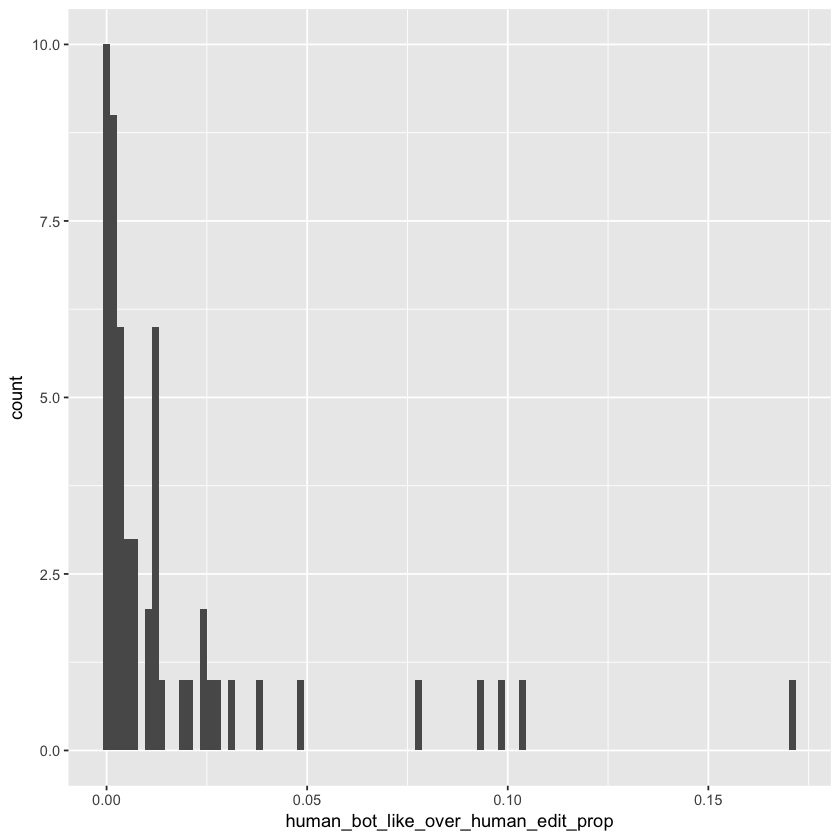

In [26]:
ggplot(longitudinal_edits,
       aes(x=human_bot_like_over_human_edit_prop)) +
geom_histogram(bins=100);

In [25]:
mean(longitudinal_edits$human_bot_like_over_human_edit_prop)

[1] 0.01824291

In [27]:
summary(longitudinal_edits$human_bot_like_over_human_edit_prop)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.789e-05 1.290e-03 5.343e-03 1.824e-02 1.739e-02 1.711e-01 

In [16]:
# detach(longitudinal_edits)
attach(longitudinal_edits)

The following objects are masked from longitudinal_edits (pos = 3):

    aligned_entities, anon_bot_like_edit, anon_bot_like_edit_prop,
    anon_edit, anon_non_bot_like_edit, anon_non_bot_like_edit_prop,
    bot_edit, bot_edit_prop, difference_in_alignment_with_previous,
    human_bot_like_edit, human_bot_like_edit_prop, human_edit,
    human_non_bot_like_edit, human_non_bot_like_edit_prop,
    semi_automated_bot_like_edit, semi_automated_bot_like_edit_prop,
    semi_automated_edit, semi_automated_non_bot_like_edit,
    semi_automated_non_bot_like_edit_prop, total_edits, yyyymm



In [17]:
agent_type_regression <- lm(difference_in_alignment_with_previous ~ scale(bot_edit) + 
                                                                   scale(semi_automated_edit) + 
                                                                   scale(human_non_bot_like_edit) + 
                                                                   scale(anon_non_bot_like_edit) +
                            
                                                                   scale(human_bot_like_edit) +
                                                                   scale(anon_bot_like_edit)                  
                          );
# scale(semi_automated_bot_like_edit) +
# How do bot-like behaviors influence changes in misalignment

In [13]:
summary(agent_type_regression)


Call:
lm(formula = difference_in_alignment_with_previous ~ scale(bot_edit) + 
    scale(semi_automated_edit) + scale(human_non_bot_like_edit) + 
    scale(anon_non_bot_like_edit) + scale(human_bot_like_edit) + 
    scale(anon_bot_like_edit))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.046137 -0.006438  0.000326  0.008234  0.067542 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)                    -0.0058376  0.0024243  -2.408   0.0200 *
scale(bot_edit)                -0.0063614  0.0027918  -2.279   0.0273 *
scale(semi_automated_edit)      0.0062876  0.0044586   1.410   0.1651  
scale(human_non_bot_like_edit) -0.0044150  0.0037488  -1.178   0.2448  
scale(anon_non_bot_like_edit)  -0.0067037  0.0039309  -1.705   0.0947 .
scale(human_bot_like_edit)      0.0036763  0.0028550   1.288   0.2042  
scale(anon_bot_like_edit)      -0.0005208  0.0026661  -0.195   0.8460  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05

In [18]:
agent_type_regression <- lm(difference_in_alignment_with_previous ~ scale(bot_edit_prop) + 
                                                                   scale(semi_automated_edit_prop) + 
                                                                   
                                                                   scale(anon_non_bot_like_edit_prop) +

                                                                   scale(human_bot_like_edit_prop) +
                                                                   scale(anon_bot_like_edit_prop)                  
                          );

# scale(human_non_bot_like_edit_prop) + 
#                                                                    scale(semi_automated_bot_like_edit_prop) +
# How do bot-like behaviors influence changes in misalignment

In [19]:
summary(agent_type_regression)


Call:
lm(formula = difference_in_alignment_with_previous ~ scale(bot_edit_prop) + 
    scale(semi_automated_edit_prop) + scale(anon_non_bot_like_edit_prop) + 
    scale(human_bot_like_edit_prop) + scale(anon_bot_like_edit_prop))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033775 -0.006600 -0.000379  0.005385  0.058172 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -0.005838   0.002015  -2.897  0.00565 ** 
scale(bot_edit_prop)               -0.043903   0.006695  -6.558 3.50e-08 ***
scale(semi_automated_edit_prop)    -0.037162   0.006256  -5.940 3.09e-07 ***
scale(anon_non_bot_like_edit_prop) -0.006679   0.003006  -2.222  0.03104 *  
scale(human_bot_like_edit_prop)     0.002434   0.002115   1.150  0.25564    
scale(anon_bot_like_edit_prop)     -0.001284   0.002339  -0.549  0.58560    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01481 o

In [11]:
summary(lm(bot_edits ~          
                       scale(semi_automated_edits) + 
                       scale(non_bot_edits) + 
                       scale(anon_edits) + 
                       scale(under_five_seconds) +
                       scale(five_to_ten_seconds) +
                       scale(ten_to_twenty_seconds) +
                       scale(twenty_to_one_hundred_seconds) +
                       scale(over_one_hundred_seconds))
)

#VIF is 1.37

ERROR: Error in eval(expr, envir, enclos): object 'bot_edits' not found


In [64]:
summary(lm(semi_automated_edits ~ scale(bot_edits) +
                                  scale(non_bot_edits) + 
                                  scale(anon_edits) + 
                                  scale(under_five_seconds) +
                                  scale(five_to_ten_seconds) +
                                  scale(ten_to_twenty_seconds) +
                                  scale(twenty_to_one_hundred_seconds) +
                                  scale(over_one_hundred_seconds))
)

#Vif is 2.22


Call:
lm(formula = semi_automated_edits ~ scale(bot_edits) + scale(non_bot_edits) + 
    scale(anon_edits) + scale(under_five_seconds) + scale(five_to_ten_seconds) + 
    scale(ten_to_twenty_seconds) + scale(twenty_to_one_hundred_seconds) + 
    scale(over_one_hundred_seconds))

Residuals:
     Min       1Q   Median       3Q      Max 
-1044662  -356270   -47331   313631  1249851 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           1248824      86062  14.511  < 2e-16 ***
scale(bot_edits)                       124518     124153   1.003 0.321251    
scale(non_bot_edits)                   110973     195774   0.567 0.573638    
scale(anon_edits)                     -298426     112462  -2.654 0.010967 *  
scale(under_five_seconds)             -130574      96915  -1.347 0.184628    
scale(five_to_ten_seconds)              14901      93456   0.159 0.874035    
scale(ten_to_twenty_seconds)          -199361     11045

In [65]:
summary(lm(non_bot_edits ~ scale(bot_edits) +
                           scale(semi_automated_edits) + 
                           scale(anon_edits) + 
                           scale(under_five_seconds) +
                           scale(five_to_ten_seconds) +
                           scale(ten_to_twenty_seconds) +
                           scale(twenty_to_one_hundred_seconds) +
                           scale(over_one_hundred_seconds))
)

#vif is 2.83


Call:
lm(formula = non_bot_edits ~ scale(bot_edits) + scale(semi_automated_edits) + 
    scale(anon_edits) + scale(under_five_seconds) + scale(five_to_ten_seconds) + 
    scale(ten_to_twenty_seconds) + scale(twenty_to_one_hundred_seconds) + 
    scale(over_one_hundred_seconds))

Residuals:
    Min      1Q  Median      3Q     Max 
-221218  -69679    8803   78656  195428 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            736177      15100  48.753  < 2e-16 ***
scale(bot_edits)                        74850      18990   3.942  0.00028 ***
scale(semi_automated_edits)             16907      29826   0.567  0.57364    
scale(anon_edits)                       22455      20954   1.072  0.28960    
scale(under_five_seconds)              -25282      16930  -1.493  0.14231    
scale(five_to_ten_seconds)              15020      16248   0.924  0.36021    
scale(ten_to_twenty_seconds)           -37006      19295  -1.918 

In [66]:
summary(lm(anon_edits ~ scale(bot_edits) +
                        scale(semi_automated_edits) + 
                        scale(non_bot_edits) +  
                        scale(under_five_seconds) +
                        scale(five_to_ten_seconds) +
                        scale(ten_to_twenty_seconds) +
                        scale(twenty_to_one_hundred_seconds) +
                        scale(over_one_hundred_seconds))
)

#Vif is 1.31


Call:
lm(formula = anon_edits ~ scale(bot_edits) + scale(semi_automated_edits) + 
    scale(non_bot_edits) + scale(under_five_seconds) + scale(five_to_ten_seconds) + 
    scale(ten_to_twenty_seconds) + scale(twenty_to_one_hundred_seconds) + 
    scale(over_one_hundred_seconds))

Residuals:
     Min       1Q   Median       3Q      Max 
-14501.6  -4888.9    452.1   6090.0  15700.9 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           28898.7     1081.3  26.725  < 2e-16 ***
scale(bot_edits)                       4110.8     1453.4   2.828  0.00696 ** 
scale(semi_automated_edits)           -5289.1     1993.2  -2.654  0.01097 *  
scale(non_bot_edits)                   2612.3     2437.7   1.072  0.28960    
scale(under_five_seconds)              -243.3     1241.5  -0.196  0.84549    
scale(five_to_ten_seconds)              406.3     1173.0   0.346  0.73069    
scale(ten_to_twenty_seconds)          -1396.3     1422.

In [83]:
summary(lm(under_five_seconds ~ scale(bot_edits) +
                                scale(semi_automated_edits) + 
                                scale(non_bot_edits) + 
                                scale(anon_edits) + 
                                scale(five_to_ten_seconds) +
                                scale(ten_to_twenty_seconds) +
                                scale(twenty_to_one_hundred_seconds) +
                                scale(over_one_hundred_seconds))
)

#Vif is 1.05


Call:
lm(formula = under_five_seconds ~ scale(bot_edits) + scale(semi_automated_edits) + 
    scale(non_bot_edits) + scale(anon_edits) + scale(five_to_ten_seconds) + 
    scale(ten_to_twenty_seconds) + scale(twenty_to_one_hundred_seconds) + 
    scale(over_one_hundred_seconds))

Residuals:
     Min       1Q   Median       3Q      Max 
-4011840 -1512124  -258896  1234102  7378080 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           5770371     368060  15.678   <2e-16 ***
scale(bot_edits)                       890280     520204   1.711   0.0939 .  
scale(semi_automated_edits)           -963733     715305  -1.347   0.1846    
scale(non_bot_edits)                 -1224838     820170  -1.493   0.1423    
scale(anon_edits)                     -101337     517008  -0.196   0.8455    
scale(five_to_ten_seconds)             295820     397355   0.744   0.4605    
scale(ten_to_twenty_seconds)          -182986     48839

In [68]:
summary(lm(five_to_ten_seconds ~ scale(bot_edits) +
                                 scale(semi_automated_edits) + 
                                 scale(non_bot_edits) + 
                                 scale(anon_edits) + 
                                 scale(under_five_seconds) +
                                 scale(ten_to_twenty_seconds) +
                                 scale(twenty_to_one_hundred_seconds) +
                                 scale(over_one_hundred_seconds))
)

#Vif is 1.02


Call:
lm(formula = five_to_ten_seconds ~ scale(bot_edits) + scale(semi_automated_edits) + 
    scale(non_bot_edits) + scale(anon_edits) + scale(under_five_seconds) + 
    scale(ten_to_twenty_seconds) + scale(twenty_to_one_hundred_seconds) + 
    scale(over_one_hundred_seconds))

Residuals:
    Min      1Q  Median      3Q     Max 
-328109 -141792  -36583   55204 1137115 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            458351      34943  13.117   <2e-16 ***
scale(bot_edits)                       -52513      50365  -1.043    0.303    
scale(semi_automated_edits)             11041      69247   0.159    0.874    
scale(non_bot_edits)                    73051      79026   0.924    0.360    
scale(anon_edits)                       16985      49040   0.346    0.731    
scale(under_five_seconds)               29698      39891   0.744    0.460    
scale(ten_to_twenty_seconds)            60455      45558   1.327 

In [69]:
summary(lm(ten_to_twenty_seconds ~ scale(bot_edits) +
                                   scale(semi_automated_edits) + 
                                   scale(non_bot_edits) + 
                                   scale(anon_edits) + 
                                   scale(under_five_seconds) +
                                   scale(five_to_ten_seconds) +
                                   scale(twenty_to_one_hundred_seconds) +
                                   scale(over_one_hundred_seconds))
)

#vif is 1.22


Call:
lm(formula = ten_to_twenty_seconds ~ scale(bot_edits) + scale(semi_automated_edits) + 
    scale(non_bot_edits) + scale(anon_edits) + scale(under_five_seconds) + 
    scale(five_to_ten_seconds) + scale(twenty_to_one_hundred_seconds) + 
    scale(over_one_hundred_seconds))

Residuals:
    Min      1Q  Median      3Q     Max 
-178237  -43598   -5894   43645  254617 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            316565      12412  25.504   <2e-16 ***
scale(bot_edits)                        20035      17857   1.122   0.2678    
scale(semi_automated_edits)            -42885      23759  -1.805   0.0778 .  
scale(non_bot_edits)                   -52251      27244  -1.918   0.0615 .  
scale(anon_edits)                      -16947      17259  -0.982   0.3314    
scale(under_five_seconds)               -5333      14234  -0.375   0.7097    
scale(five_to_ten_seconds)              17551      13226   1.327 

In [70]:
summary(lm(twenty_to_one_hundred_seconds ~ scale(bot_edits) +
                                           scale(semi_automated_edits) + 
                                           scale(non_bot_edits) + 
                                           scale(anon_edits) + 
                                           scale(under_five_seconds) +
                                           scale(five_to_ten_seconds) +
                                           scale(ten_to_twenty_seconds) +
                                           scale(over_one_hundred_seconds))
)

#vif is 7.33


Call:
lm(formula = twenty_to_one_hundred_seconds ~ scale(bot_edits) + 
    scale(semi_automated_edits) + scale(non_bot_edits) + scale(anon_edits) + 
    scale(under_five_seconds) + scale(five_to_ten_seconds) + 
    scale(ten_to_twenty_seconds) + scale(over_one_hundred_seconds))

Residuals:
   Min     1Q Median     3Q    Max 
-84860 -34319  -1786  27090  95331 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       444868       5949  74.782  < 2e-16 ***
scale(bot_edits)                  -19322       8185  -2.361 0.022639 *  
scale(semi_automated_edits)        41449      10044   4.127 0.000157 ***
scale(non_bot_edits)               19800      13256   1.494 0.142249    
scale(anon_edits)                  20949       7755   2.701 0.009699 ** 
scale(under_five_seconds)          10349       6656   1.555 0.127016    
scale(five_to_ten_seconds)          1220       6459   0.189 0.850987    
scale(ten_to_twenty_seconds)       13

In [71]:
summary(lm(over_one_hundred_seconds ~ scale(bot_edits) +
                                      scale(semi_automated_edits) + 
                                      scale(non_bot_edits) + 
                                      scale(anon_edits) + 
                                      scale(under_five_seconds) +
                                      scale(five_to_ten_seconds) +
                                      scale(ten_to_twenty_seconds) +
                                      scale(twenty_to_one_hundred_seconds))
)

# vif is 5.28


Call:
lm(formula = over_one_hundred_seconds ~ scale(bot_edits) + scale(semi_automated_edits) + 
    scale(non_bot_edits) + scale(anon_edits) + scale(under_five_seconds) + 
    scale(five_to_ten_seconds) + scale(ten_to_twenty_seconds) + 
    scale(twenty_to_one_hundred_seconds))

Residuals:
   Min     1Q Median     3Q    Max 
-42017 -14227  -1082  12005  56715 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          169959.4     2881.3  58.987  < 2e-16 ***
scale(bot_edits)                      -5017.3     4135.7  -1.213   0.2314    
scale(semi_automated_edits)            -598.7     5710.8  -0.105   0.9170    
scale(non_bot_edits)                  16482.4     6101.6   2.701   0.0097 ** 
scale(anon_edits)                     -3473.8     4015.8  -0.865   0.3916    
scale(under_five_seconds)              2475.3     3288.8   0.753   0.4556    
scale(five_to_ten_seconds)            -2309.3     3110.7  -0.742   0.4617  

In [119]:
independent_and_dependent_variables = data.table(bot_edits = bot_edits, semi_automated_edits = semi_automated_edits, non_bot_edits = non_bot_edits, anon_edits = anon_edits, difference_in_alignment_with_previous = difference_in_alignment_with_previous, under_five_seconds = under_five_seconds, five_to_ten_seconds_proportion = five_to_ten_seconds_proportion, ten_to_twenty_proportion = ten_to_twenty_proportion, twenty_to_one_hundred_seconds_proportion = twenty_to_one_hundred_seconds_proportion, over_one_hundred_seconds_proportion = over_one_hundred_seconds_proportion)

In [73]:
edit_type_regression_without_anon <- lm(difference_in_alignment_with_previous ~ scale(bot_edits) + scale(semi_automated_edits) + scale(non_bot_edits))

In [74]:
anon_residuals = data.frame(month=as.Date(paste(yyyymm, "01", sep=""), format="%Y%m%d"), anon_edits = anon_edits, residuals= edit_type_regression_without_anon$residuals)

In [75]:
summary(anon_residuals)

     month              anon_edits      residuals         
 Min.   :2012-12-01   Min.   : 2066   Min.   :-0.0490774  
 1st Qu.:2014-01-08   1st Qu.:24126   1st Qu.:-0.0083774  
 Median :2015-02-15   Median :30338   Median : 0.0004912  
 Mean   :2015-02-15   Mean   :28899   Mean   : 0.0000000  
 3rd Qu.:2016-03-24   3rd Qu.:34526   3rd Qu.: 0.0061725  
 Max.   :2017-05-01   Max.   :47741   Max.   : 0.0702785  

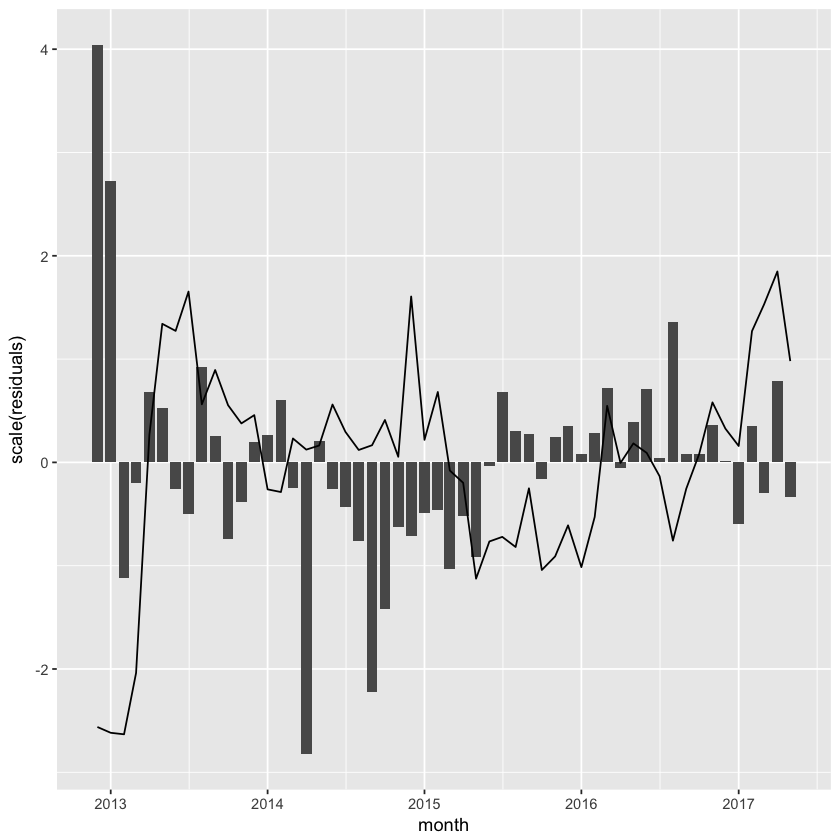

In [76]:
ggplot(anon_residuals, aes(x=month, y=scale(residuals))) + geom_bar(stat="identity") + geom_line(aes(y=scale(anon_edits)))

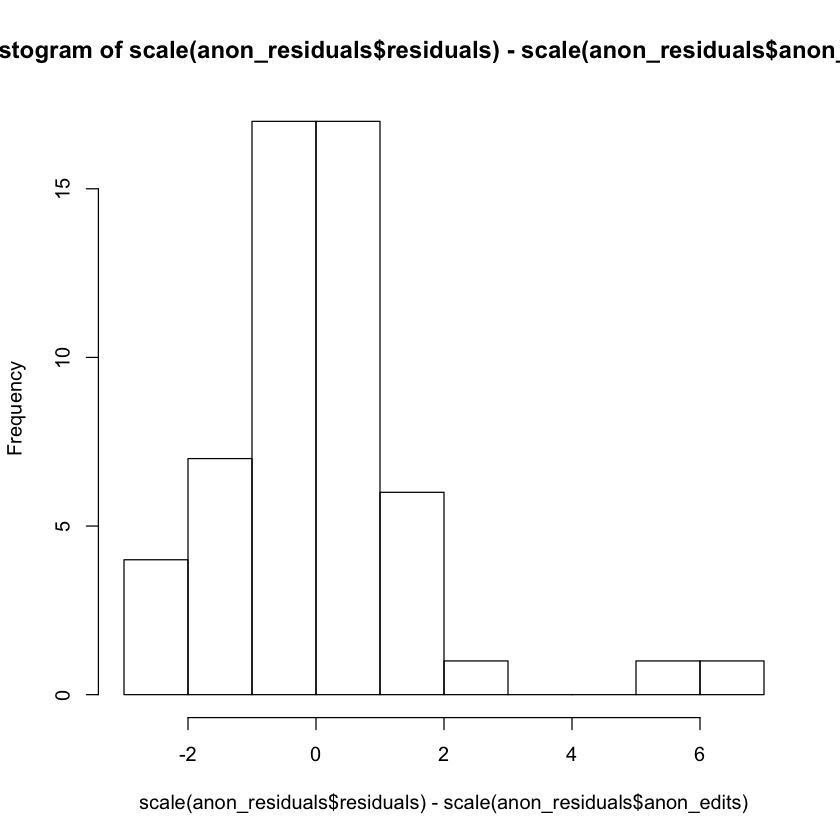

In [77]:
hist(scale(anon_residuals$residuals)- scale(anon_residuals$anon_edits))

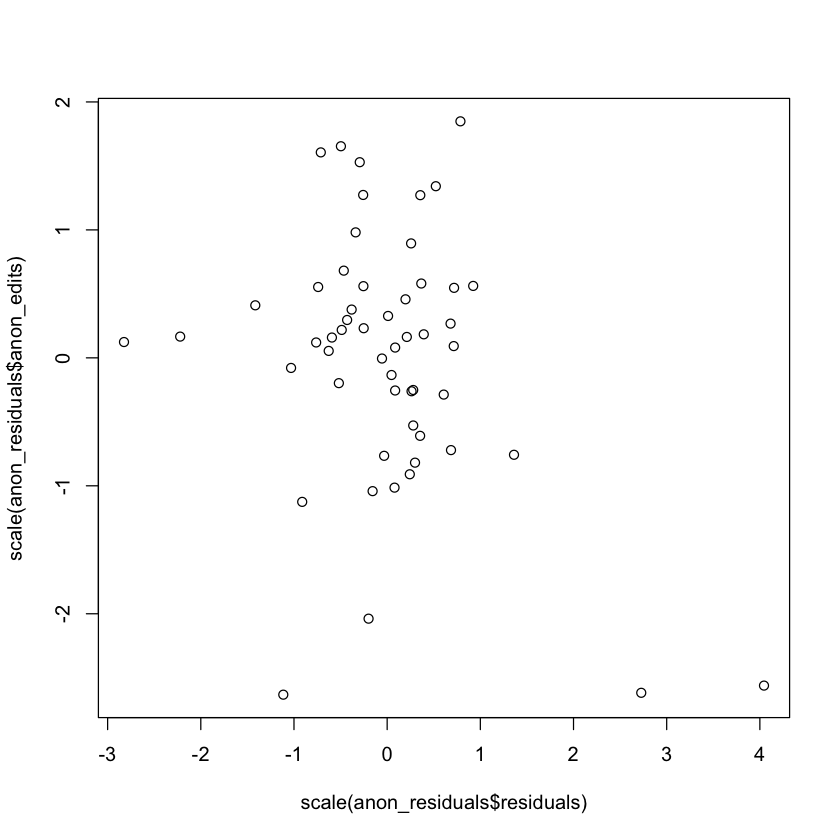

In [78]:
plot(scale(anon_residuals$residuals), scale(anon_residuals$anon_edits))

In [120]:
cor(independent_and_dependent_variables, method="spearman")

,bot_edits,semi_automated_edits,non_bot_edits,anon_edits,difference_in_alignment_with_previous,under_five_seconds,five_to_ten_seconds_proportion,ten_to_twenty_proportion,twenty_to_one_hundred_seconds_proportion,over_one_hundred_seconds_proportion
bot_edits,1.0000000,-0.12531453,0.13825043,0.31846770,-0.35765199,0.11347437,-0.23209453,-0.19794168,-0.20045740,-0.24208119
semi_automated_edits,-0.1253145,1.00000000,0.61521160,-0.03545559,0.20716737,0.16747999,0.01993900,0.03903927,0.46138011,0.48040413
non_bot_edits,0.1382504,0.61521160,1.00000000,0.22645321,0.16378883,0.17773966,0.08709739,-0.06559939,0.35849057,0.34217648
anon_edits,0.3184677,-0.03545559,0.22645321,1.00000000,-0.35544120,0.07093577,-0.11202592,-0.13497237,0.03563941,-0.04082333
difference_in_alignment_with_previous,-0.3576520,0.20716737,0.16378883,-0.35544120,1.00000000,0.11820088,-0.03800267,-0.19801791,0.05828092,0.13306651
under_five_seconds,0.1134744,0.16747999,0.17773966,0.07093577,0.11820088,1.00000000,-0.56851534,-0.71503716,-0.63323804,-0.58056032
five_to_ten_seconds_proportion,-0.2320945,0.01993900,0.08709739,-0.11202592,-0.03800267,-0.56851534,1.00000000,0.50150562,0.48816467,0.41078712
ten_to_twenty_proportion,-0.1979417,0.03903927,-0.06559939,-0.13497237,-0.19801791,-0.71503716,0.50150562,1.00000000,0.71374119,0.67524300
twenty_to_one_hundred_seconds_proportion,-0.2004574,0.46138011,0.35849057,0.03563941,0.05828092,-0.63323804,0.48816467,0.71374119,1.00000000,0.91774347
over_one_hundred_seconds_proportion,-0.2420812,0.48040413,0.34217648,-0.04082333,0.13306651,-0.58056032,0.41078712,0.67524300,0.91774347,1.00000000


In [80]:
VIF(edit_type_regression)

[1] 2.468682

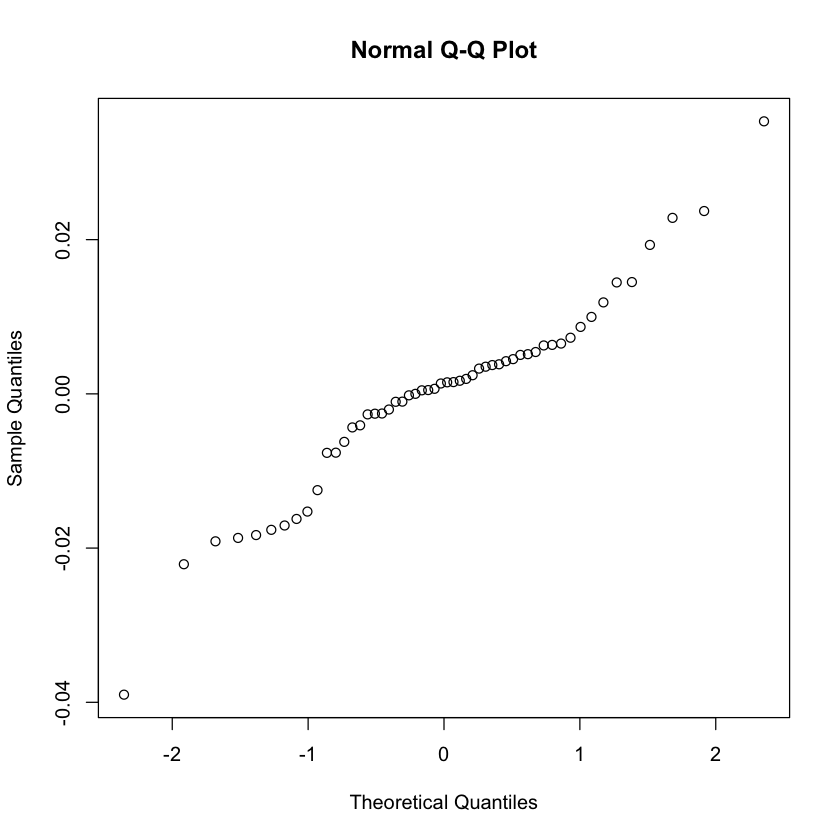

In [81]:
qqnorm(edit_type_regression$residuals)

In [82]:
names(edit_type_regression)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"